<a href="https://colab.research.google.com/github/cathelijne2/assignment-1/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# preperation
here we prepare everything, by importing the packages we need and read in the dataset. 

In [1]:
# voor algemeen gebruik
import pandas as pd
import numpy as np

#voor het koppelen van google sheets aan google colab
from google.colab import auth
import gspread
from oauth2client.client import GoogleCredentials
from google.auth import default

# voor het plotten 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('123inkt_assesment_data').sheet1
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(rows)
# give correct columnnames
df.columns = df.iloc[0]
df = df.iloc[1:,:]
# quick check
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Above we see that most columns only have one piece of information except for InvoiceDate. In this column there is both time and date and to use it these should at least be separated into two columns. However it is better to seperate dates also in months, days and years so we can use that at will however we like.  


In [3]:
df[["Date","Time"]] = df.InvoiceDate.str.split(' ',expand=True)
df[["month","day","year"]] = df.Date.str.split("/", expand=True)
df[["hour","minute"]] = df.Time.str.split(":", expand = True)

The next thing that is important before going to work with data is that the types of the data are correct. So below we first look at what the types are and change those that are important to change.  

In [4]:
df.dtypes

0
InvoiceNo      object
StockCode      object
Description    object
Quantity       object
InvoiceDate    object
UnitPrice      object
CustomerID     object
Country        object
Date           object
Time           object
month          object
day            object
year           object
hour           object
minute         object
dtype: object

In [5]:
df.Quantity = pd.to_numeric(df.Quantity)
df.UnitPrice = pd.to_numeric(df.UnitPrice)
df.iloc[:,8:12] = df.iloc[:,8:12].apply(pd.Categorical)
df.iloc[:,13:14] = df.iloc[:, 13:14].apply(pd.to_numeric)
df.Date = pd.to_datetime(df["Date"], format = "%m/%d/%Y")

In [6]:
df.dtypes

0
InvoiceNo        object
StockCode        object
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID       object
Country          object
Date           category
Time           category
month          category
day            category
year             object
hour              int64
minute           object
dtype: object

Since the collumns have the right type we can now look at what the columns mean. 

* InvoiceNo - identification number for the invoice
* stockcode - code to identify the object ordered in storage
* description - a short description of the product
* quantity - the amount of the product ordered
* InvoiceDate - the date and time of the order
* UnitPrice - the price per unit
* CustomerID - the identification number of the customer
* Country - the land from which the order originates
* Date - only the date formated Month, Day, Year
* Time - only the time of order formated Hour, Minute
* month, day, year, hour, minute - further separation of date and time

We see that there is still no full price of the Invoice in order to say something about the preformance it could be important to create this column, as done below.  

In [7]:
df["total_invoice_price"] = df.Quantity*df.UnitPrice

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,month,day,year,hour,minute,total_invoice_price
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010-12-01,8:26,12,1,2010,8,26,15.30
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,8:26,12,1,2010,8,26,20.34
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010-12-01,8:26,12,1,2010,8,26,22.00
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,8:26,12,1,2010,8,26,20.34
5,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010-12-01,8:26,12,1,2010,8,26,20.34


# Assignment
The assignment given with the dataset is very freeform with only one question in the center. This question was: **how did we do in the last month?**

to define preformance we can look at couple of things. 

* the income in absolute values 
* the income in compairison from last months income

Since the question points in the direction of months we will constantly be coming back to the monthly part of the dataset, however as we look more closely at the data set we see we have december of 2010 and december of 2011 because of this we require a date containing month and year.  





In [9]:
df['date'] = df[['year','month']].apply("-".join, axis = 1)
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m")

With this last preparation done we can now create a table with the total_invoice_price per month.

In [10]:
Q_U_year_month = df.groupby('date').sum()[['total_invoice_price']]
Q_U_year_month

,total_invoice_price
date,
2010-12-01,748957.020
2011-01-01,560000.260
2011-02-01,498062.650
2011-03-01,683267.080
2011-04-01,493207.121
2011-05-01,723333.510
2011-06-01,691123.120
2011-07-01,681300.111
2011-08-01,682680.510


However a table does not make it intuitively to understand how we preform so we create a graph. 

(array([734138., 734197., 734258., 734319., 734381., 734442.]),
 <a list of 6 Text major ticklabel objects>)

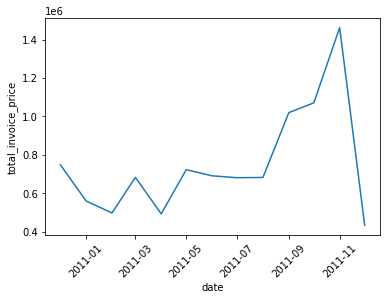

In [23]:
plot = sns.lineplot(data = Q_U_year_month, x = 'date', y= "total_invoice_price")
plt.xticks(rotation=45)


above we only look at the absolute numbers which does tell you something about how wel a certain month did, however this does not show the compairison yet. Below we will create a graph showing the performance related to the month before. 

In [12]:
Q_U_year_month["last_month"] = ([Q_U_year_month.total_invoice_price[0]] + list(Q_U_year_month.total_invoice_price))[:-1]

In [13]:
Q_U_year_month["difference"] = Q_U_year_month.total_invoice_price - Q_U_year_month.last_month
Q_U_year_month.head()

,total_invoice_price,last_month,difference
date,,,
2010-12-01,748957.020,748957.02,0.000
2011-01-01,560000.260,748957.02,-188956.760
2011-02-01,498062.650,560000.26,-61937.610
2011-03-01,683267.080,498062.65,185204.430
2011-04-01,493207.121,683267.08,-190059.959


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

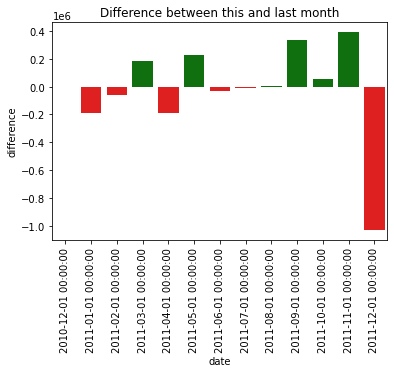

In [14]:
cols = ['red' if x < 0 else 'green' for x in Q_U_year_month.difference]
plot = sns.barplot(data = Q_U_year_month, x = Q_U_year_month.index, y= "difference",palette=cols ).set(title='Difference between this and last month')
plt.xticks(rotation=90)

As we now have explored the most obvious ways to look at performance we can now focus on the other parts of the data. 

# Countries

As we look at the general idea of what the income is over the different month we also have the knowledge about the countries which are ordering something. In this next part we look at which country orders the most. For a general look we first leave out the aspect of the months. 

However since it might change over the year which country orders the most this is something that we will look at too.

## overall

In [70]:
# calc the percentage unitprice per country
total_unitPrices = df.groupby('Country').sum()['total_invoice_price'].sort_values(ascending = False).sum()

df2 = df.groupby('Country').sum()['total_invoice_price'].sort_values(ascending = False)/total_unitPrices

# get the top five
df2 = df2.head()

rest = (1-df2.sum())
df2.loc[len(df2)] = rest

df2 = df2.rename(index = {5: "other"})

In [71]:
df2

Country
United Kingdom    0.839969
Netherlands       0.029203
EIRE              0.027009
Germany           0.022744
France            0.020251
other             0.060824
Name: total_invoice_price, dtype: float64

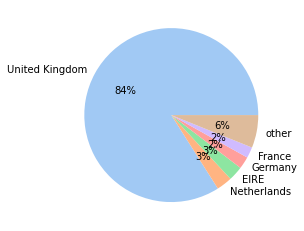

In [72]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.pie(df2, labels = df2.index, colors = colors, autopct='%.0f%%')
plt.show()

Above we see a pie chart of the 5 countries that spend the most and a combination of the other 72 countries together.

## countries per month
As we have developed a general idea of which countries are the biggest spenders we can now explore whether this changes over the different months. 

In [16]:
months = list(set(df.month))

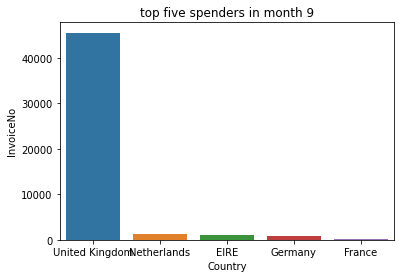

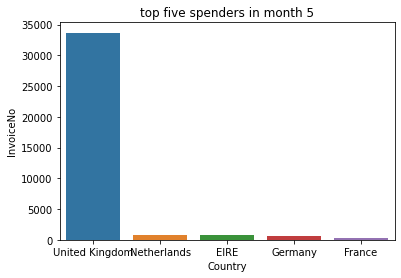

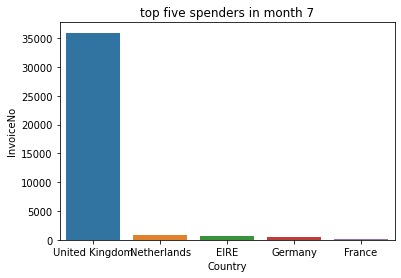

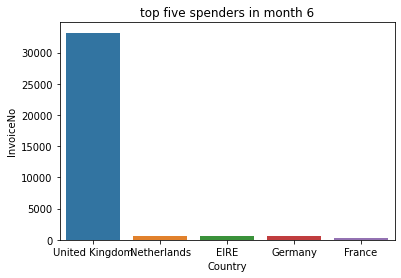

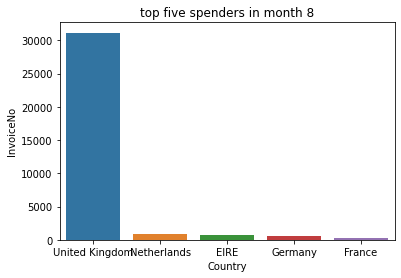

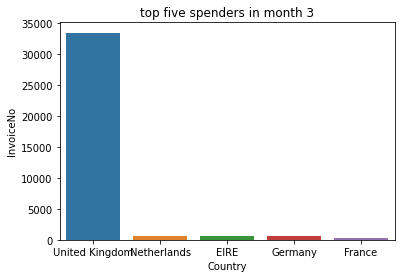

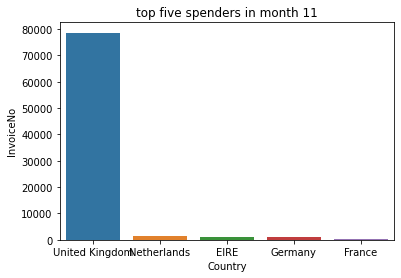

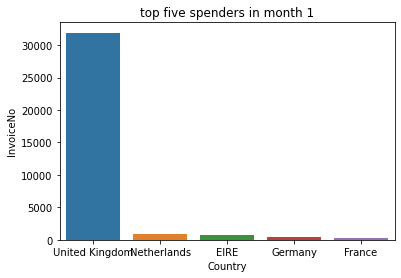

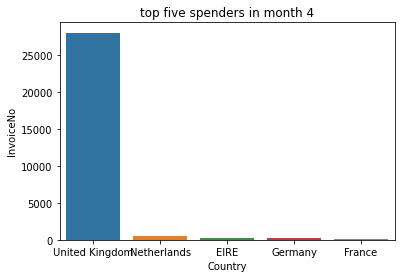

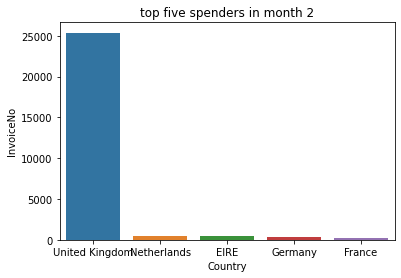

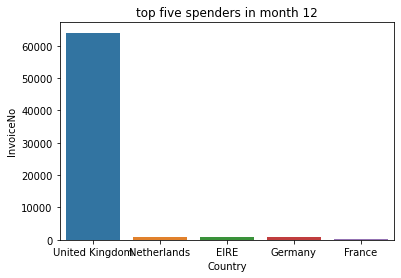

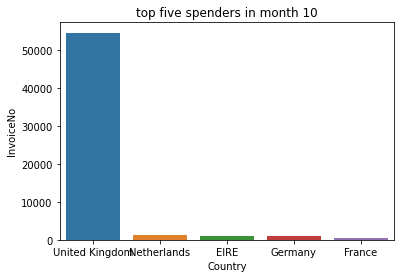

In [17]:
for month in range(len(months)):
  df_fun = df[df['month'] == months[month]][['Country', 'InvoiceNo']].groupby('Country').count().sort_values('InvoiceNo',ascending=False).head()
  plot = sns.barplot(data = df_fun, x = df2.index, y= "InvoiceNo").set(title='top five spenders in month ' + months[month])
  plt.show(plot)

When we look at the graphs above we can see that every month the same countries spend the most. 
 

# Customer ID
We can also get some information about how many different items a certain customer orders by using the customerID column in the data. From the graph created below we could say that many customers order a couple of different items

(0.0, 1000.0)

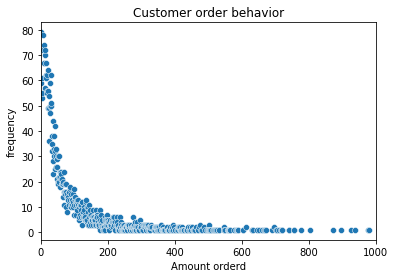

In [81]:
df2 = df.groupby("CustomerID").count()
df2 = df2[["InvoiceNo","StockCode"]].groupby("InvoiceNo").count()
sns.scatterplot(data = df2, x = df2.index, y= "StockCode").set(xlabel = "Amount orderd", ylabel = "frequency", title = "Customer order behavior")
plt.xlim(0, 1000)